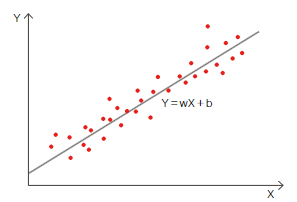

In [2]:
import pandas as pd
import numpy as np

In [3]:
batter_df = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/batter.csv')
picher_df = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/picher.csv')

In [4]:
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [5]:
picher_df.shape

(152, 22)

In [6]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'fonts-nanum'

In [8]:
picher_df['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

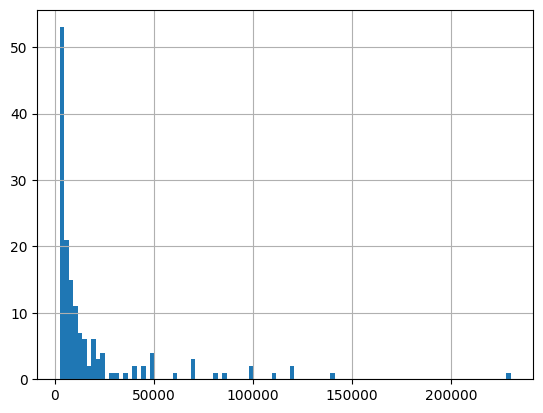

In [9]:
plt.hist(picher_df['연봉(2018)'],bins=100)
plt.grid()
plt.show()

<Axes: >

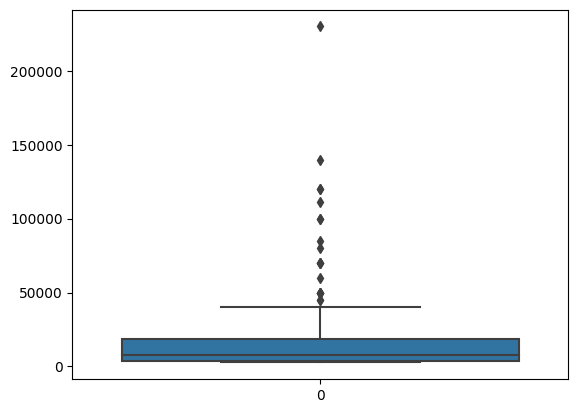

In [10]:
import seaborn as sns
sns.boxplot(picher_df['연봉(2018)'])


In [11]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [12]:
# 회귀분석에 사용할 특성를 선택
cols = picher_df.columns[2:]
cols

Index(['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')

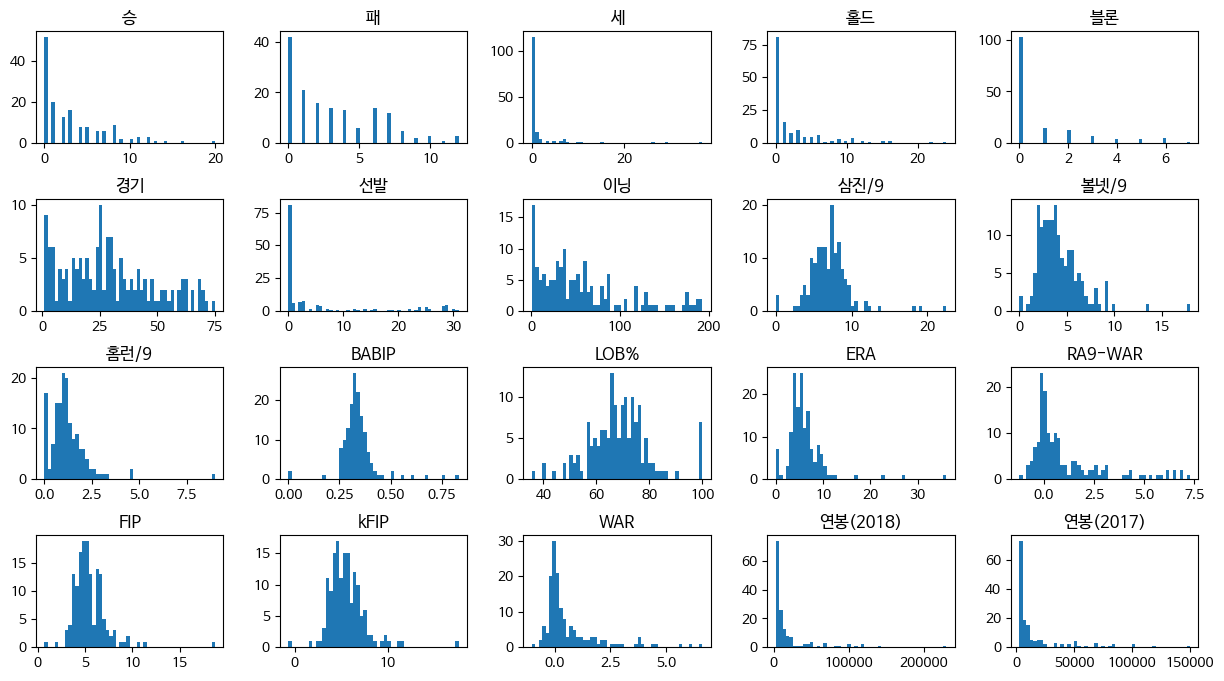

In [17]:
# 히스토그램을 통해서 데이터의 분포를 시각적으로 확인
plt.figure(figsize=(15,8))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
for i in range(len(cols)):
  plt.subplot(4,5,i+1)
  plt.hist(picher_df[cols[i]], bins=50)
  plt.title(cols[i])  
plt.show()  

In [24]:
# 스케일링
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ss = StandardScaler()
X = picher_df.drop(columns=['선수명','팀명','연봉(2018)'])
y = picher_df['연봉(2018)']
X_scaled = ss.fit_transform(X)

In [61]:
cols = list(picher_df.columns[2:-2]) + ['연봉(2017)']
print(cols)

['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']


In [48]:
# one- hot encoding
# 개 고양이 사자
# 1  0       0
# 0 1      0
# 0 0      1
team_encoding =  pd.get_dummies(picher_df['팀명'])
X_scaled_df = pd.DataFrame(X_scaled, columns=cols)
X_scaled_df = pd.concat([X_scaled_df,team_encoding], axis=1)
X_scaled_df.head()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,0.674321,-0.871873,...,2.743746,0,0,0,0,1,0,0,0,0
1,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,0.134976,-0.990767,...,1.341724,0,0,1,0,0,0,0,0,0
2,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,0.110138,-0.888857,...,5.347500,1,0,0,0,0,0,0,0,0
3,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,0.351424,-0.948305,...,3.344612,0,0,1,0,0,0,0,0,0
4,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,...,2.743746,0,0,0,0,0,0,1,0,0


회귀분석 적용하기

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
# 모델준비하기
lr = LinearRegression()

In [51]:
# 데이터 분리하기
x_train,x_test,y_train,y_test = train_test_split(X_scaled_df,y,random_state=42)

In [52]:
# 모델 학습
lr.fit(x_train,y_train)

LinearRegression()

In [53]:
# 회귀 계수 출력하기
lr.coef_

array([  4275.70472857,   -733.92522229,   -443.71316901,  -1127.16218213,
          999.02769204,  -4688.22078678, -12287.99794284,  10287.9892736 ,
         3066.41059196,   5588.04678352,  12438.88289024,  -2016.26394952,
          643.39847158,   1936.15651647,  -1099.53028955, -67976.86463099,
        57700.61368947,  12156.18593342,  21312.23273105,   7353.91637876,
         2303.85227188,  -1512.97388733,  -1341.43843238,   -103.79901464,
        -4227.6868152 ,   -618.43449436,  -4148.53556228,   2295.09955555])

In [54]:
lr.score(x_train,y_train), lr.score(x_test,y_test)

(0.9344519586230713, 0.7330121587681995)

In [55]:
# 어떤 피처가 영향력이 강할까?
import statsmodels.api as sm
# statsmodels 라이브러리로 회귀 분석을 수행한다
x_train_stats = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_stats).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     45.41
Date:                Fri, 19 May 2023   Prob (F-statistic):           5.19e-40
Time:                        04:42:15   Log-Likelihood:                -1195.6
No. Observations:                 114   AIC:                             2447.
Df Residuals:                      86   BIC:                             2524.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.723e+04    894.132     19.273      0.000    1.55e+04     1.9e+04
승           4275.7047   2899.381      1.475      0.144   -1488.075       1e+04
패           -733.9252   2324.004     -0.316      0.753   -5353.893    3886.043
세           -443.7132   1880.491     -0.236      0.814   -4182.005    3294.578
홀드         -1127.1622   2128.669     -0.530      0.598   -5358.817    3104.492
블론           999.0277   1607.139      0.622      0.536   -2195.859    4193.914
경기         -4688.2208   3987.774     -1.176      0.243   -1.26e+04    3239.212
선발         -1.229e+04   6748.999     -1.821      0.072   -2.57e+04    1128.567
이닝          1.029e+04   8743.122      1.177      0.243   -7092.762    2.77e+04
삼진/9        3066.4106   8843.702      0.347      0.730   -1.45e+04    2.06e+04
볼넷/9        5588.0468   6878.189      0.812      0.419   -8085.340    1.93e+04
홈런/9        1.244e+04   1.85e+04      0.671      0.504   -2.44e+04    4.93e+04
BABIP      -2016.2639   1642.852     -1.227      0.223   -5282.145    1249.617
LOB%         643.3985   2037.779      0.316      0.753   -3407.573    4694.370
ERA         1936.1565   2971.030      0.652      0.516   -3970.055    7842.368
RA9-WAR    -1099.5303   3341.010     -0.329      0.743   -7741.239    5542.178
FIP        -6.798e+04   1.08e+05     -0.631      0.530   -2.82e+05    1.46e+05
kFIP         5.77e+04    9.2e+04      0.627      0.532   -1.25e+05    2.41e+05
WAR         1.216e+04   2906.385      4.183      0.000    6378.484    1.79e+04
연봉(2017)    2.131e+04   1426.955     14.935      0.000    1.85e+04    2.41e+04
KIA         9268.6269   3322.170      2.790      0.006    2664.371    1.59e+04
KT          4218.5628   2674.755      1.577      0.118   -1098.675    9535.800
LG           401.7366   2983.849      0.135      0.893   -5529.959    6333.432
NC           573.2721   3331.368      0.172      0.864   -6049.269    7195.813
SK          1810.9115   2837.653      0.638      0.525   -3830.156    7451.979
두산         -2312.9763   3211.532     -0.720      0.473   -8697.291    4071.339
롯데          1296.2760   3214.177      0.403      0.688   -5093.296    7685.849
삼성         -2233.8250   2732.728     -0.817      0.416   -7666.308    3198.658
한화          4209.8101   2729.538      1.542      0.127   -1216.331    9635.951
==============================================================================
Omnibus:                       23.769   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.689
Skew:                          -0.148   Prob(JB):                     5.23e-38
Kurtosis:                       9.005   Cond. No.                     2.82e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


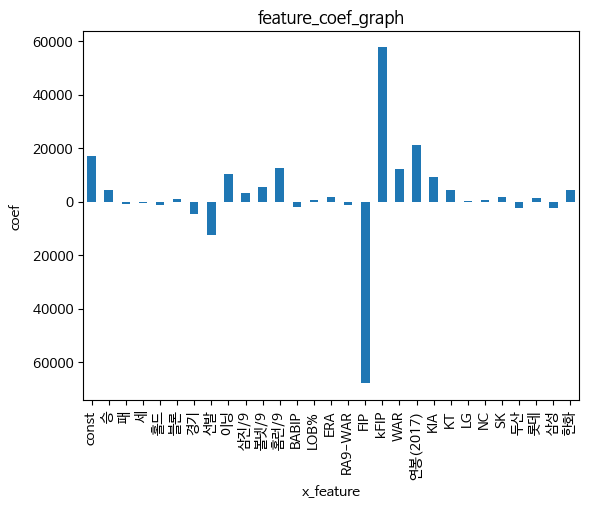

In [65]:
coefs =  model.params.tolist()
coefs_series = pd.Series(coefs)
# 변수명을 리스트로 출력
x_labels = model.params.index.tolist()
# 회귀 계수를 출력
ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_feature')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)
plt.show()

In [66]:
# 피처명                 유의미한 피처            영향력이 큰 피처
# fip                          x                      0
# kfip                         x                      0
# war                          0                      0
# 연봉(2017)                   0                      0
# 홈런                         x                      0 

In [67]:
# 올바른 피처를 선택하려면... 
# 상관지수를 보면..선형관계파악 
# 변수들끼리 선형관계가 있는 리스트 
# 회귀분석 : 피처간의 독립성을 전재로 함 
# 상관관계에 있는피처들의 쌍을 제거 해야 함  다중 공선성 
# VIF(variance inflation factor, 분상팽창요인 ) : 10 ~ 15정도를 넘으면 문제가 발생했다고 봄

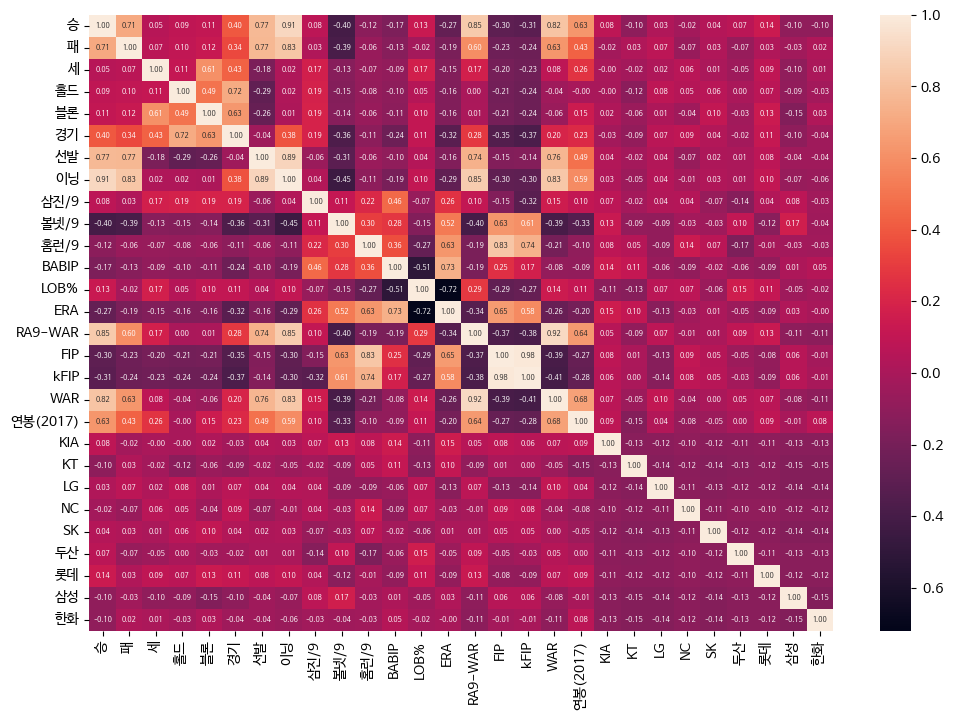

In [73]:
# 변수들간의 상관관계를 heatmap 그려봅시다
import seaborn as sns
corr = X_scaled_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot = True,fmt='.2f',annot_kws = {'size':5})
plt.show()

회귀분석 예측 성능을 높이기 위한 다중공선성 확인

In [90]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
def confirmVif(data = X_scaled_df):  
  # 각 피처마다 VIF 계수를 확인
  vif = pd.DataFrame()
  vif['VIF FACTOR']  =  [ variance_inflation_factor(data.values,i) for i in range(data.shape[1]) ]
  vif['columns'] = data.columns
  vif = vif.round(1)
  vif = vif.sort_values(by='VIF FACTOR', ascending=False)
  vif.reset_index(drop=True,inplace=True)  
  return vif

In [91]:
confirmVif(X_scaled_df)

,VIF FACTOR,columns
0,14238.3,FIP
1,10264.1,kFIP
2,425.6,홈런/9
3,89.5,삼진/9
4,63.8,이닝
5,57.8,볼넷/9
6,39.6,선발
7,14.6,경기
8,13.6,RA9-WAR
9,10.6,ERA


In [ ]:
# Feature selected schedule
# 1. VIF remove(when value 10 over....)  도메인지식을 이용해서 유사한 피처가 있으며 하나만 (FIP, kFIP)
# 2. VIF
# 3. 남은 피처들로 회귀분석을 실시  statsmodels 라이브러리로 회귀 분석 하고 
#   p-value가 유의하면서 영향력(# 회귀 계수를 출력)이 큰 피처들을 선정
# 머신러닝 모델을 수행
#  만약에.. overfit 발생하면.... 규제알고리즘을 적용

In [ ]:
cols = confirmVif(X_scaled_df)[confirmVif(X_scaled_df)['VIF FACTOR'] < 10]['columns'].values
X_scaled_df.loc[:,cols]

In [ ]:
confirmVif(X_scaled_df.loc[:,cols])

In [100]:
import statsmodels.api as sm
def olsSummary(x_train = x_train, y_train=y_train):
  # statsmodels 라이브러리로 회귀 분석을 수행한다
  x_train_stats = sm.add_constant(x_train)
  model = sm.OLS(y_train, x_train_stats).fit()
  coefs =  model.params.tolist()
  # print(model.summary())
  return model, coefs

In [101]:
# 최종적으로 분류한 feature를 가지고 배운 모델을 모델 리스트에 담아서
# corss_validation 을 수행 하고 가장 높은 모델을 다시 선택해서
# 하이퍼 파라메터 튜닝을 통해 score값을 출력